In [1]:
from keras.preprocessing import image
import os 
folders = os.listdir("./breast-histopathology-images/8867/")
print(folders)

image_data = []
labels = []


label_dict = {"noncancer":0,"cancer":1}

for ix in folders:
    path = os.path.join("./breast-histopathology-images/8867/",ix)
    print(path)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size=((224,224)))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[ix])

Using TensorFlow backend.


['cancer', 'noncancer']
./breast-histopathology-images/8867/cancer
./breast-histopathology-images/8867/noncancer


In [2]:
import random
import numpy as np
combined = list(zip(image_data,labels))
random.shuffle(combined)

image_data[:],labels[:] = zip(*combined)

In [3]:
print(labels[:15])#First five labels

[1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1]


In [4]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import SeparableConv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import *

In [5]:
#CNN model

model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape = (50,50,3)))#32 filters each going to be 3*3 matrix 
#for first we have to give input_shape
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Convolution2D(64,(3,3),activation='relu'))#For all layers we dont need to specify input shape
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Convolution2D(128,(3,3),activation='relu'))#For all layers we dont need to specify input shape
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())# its not a layer its just a reshaper function,it will make 3d volume to a linear layer
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation = 'softmax'))#dense have value of 10 which means 10 neurons so we can predict output for 10 classes 
model.summary()

#we increase the no. pf filter for complex images ,so we increase the depth by this


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)       

In [6]:
X_train = np.array(image_data)
Y_train = np.array(labels)


print(X_train.shape,Y_train.shape)

(324, 224, 224, 3) (324,)


In [7]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(Y_train)
print(X_train.shape)
print(Y_train.shape)

(324, 224, 224, 3)
(324, 2)


In [8]:
#Create the resnet 50 model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_imagedata = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_imagedata = ImageDataGenerator(rescale=1./255)

In [10]:
training_set = \
    train_imagedata.flow_from_directory('.\\breast-histopathology-images\\8867/',shuffle = True
        , target_size=(50, 50), batch_size=32, class_mode='categorical')

val_set = \
    test_imagedata.flow_from_directory('.\\breast-histopathology-images\\8914/',shuffle = False
        , target_size=(50, 50), batch_size=32, class_mode='categorical')

test_set = \
    test_imagedata.flow_from_directory('.\\breast-histopathology-images\\8917/',shuffle = False
        , target_size=(50, 50), batch_size=32, class_mode='categorical')


Found 324 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


In [11]:
model.compile(loss="binary_crossentropy", optimizer='adam',metrics=["accuracy"])


In [12]:
history=model.fit_generator(training_set, steps_per_epoch=1000, epochs=15,
                         validation_data=val_set,
                         validation_steps=30,)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/15
1000/1000 [==============================] - 92s 92ms/step - loss: 0.1583 - accuracy: 0.9341 - val_loss: 0.4515 - val_accuracy: 0.7467
Epoch 2/15
1000/1000 [==============================] - 84s 84ms/step - loss: 0.0679 - accuracy: 0.9756 - val_loss: 1.8259 - val_accuracy: 0.5867
Epoch 3/15
1000/1000 [==============================] - 78s 78ms/step - loss: 0.0398 - accuracy: 0.9866 - val_loss: 2.0831 - val_accuracy: 0.5733
Epoch 4/15
1000/1000 [==============================] - 80s 80ms/step - loss: 0.1757 - accuracy: 0.9336 - val_loss: 0.3006 - val_accuracy: 0.7067
Epoch 5/15
1000/1000 [==============================] - 75s 75ms/step - loss: 0.0990 - accuracy: 0.9622 - val_loss: 0.0912 - val_accuracy: 0.7333
Epoch 6/15
1000/1000 [==============================] - 76s 76ms/step - loss: 0.0433 - accuracy: 0.9841 - val_loss: 0.6332 - val_accuracy: 0.6867
Epoch 7/15
1000/1000 [=======

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

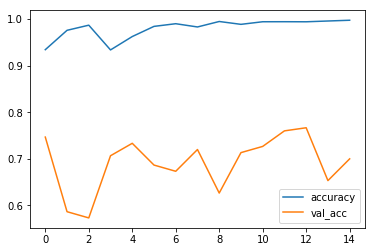

In [14]:
plt.plot(acc,label='accuracy')
plt.plot(val_acc,label='val_acc')
plt.legend()
plt.show()

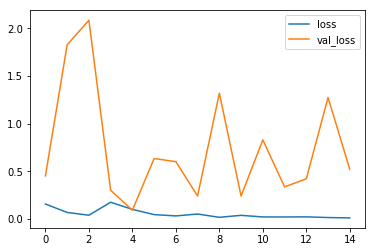

In [15]:
plt.plot(loss,label='loss')
plt.plot(val_loss,label= 'val_loss')
plt.legend()
plt.show()

In [26]:
test_image = \
    image.load_img('./test/8864_idx5_x1801_y2451_class1.png',
                    target_size=(50,50))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis =0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    print('cancer')
else:
    print('noncancer')

noncancer


In [28]:
test_image = \
    image.load_img('./test/8864_idx5_x201_y2351_class0.png',
                    target_size=(50,50))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis =0)
result = model.predict(test_image)
training_set.class_indices
print(result[0][0])

0.0


In [23]:
test_image = \
    image.load_img('./test/8864_idx5_x201_y2301_class0.png',
                    target_size=(50,50))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis =0)
result = model.predict(test_image)
print(result[0][0])

0.0


In [24]:
import numpy as np
test_image = \
    image.load_img('./test/8864_idx5_x51_y2201_class0.png',
                    target_size=(50,50))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis =0)
result = model.predict_classes(test_image)
result

array([1], dtype=int64)